[View in Colaboratory](https://colab.research.google.com/github/XinyueZ/tf/blob/master/ipynb/earthquakes.ipynb)

# A sample to show earthquakes in last 7 days

**Install basemap**,  kernal reboot is "must"

In [6]:
!apt-get install python-mpltoolkits.basemap

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-mpltoolkits.basemap is already the newest version (1.0.7+dfsg-4build2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


**Reboot python**

In [0]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [0]:
import csv
import urllib2
import cStringIO
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [8]:
class EarthQuake:
  def __init__(self, row):
    # Parse earthquake data from USGS
    self.timestamp = row[0]
    self.lat = float(row[1])
    self.lon = float(row[2])
    try:
      self.magnitude = float(row[4])
    except ValueError:
      self.magnitude = 0
    
def get_earthquake_data(url):
  # Read CSV earthquake data from USGS
  response = urllib2.urlopen(url)
  csvio = cStringIO.StringIO(response.read())
  reader = csv.reader(csvio)
  header = next(reader)
  quakes = [EarthQuake(row) for row in reader]
  quakes = [q for q in quakes if q.magnitude > 0]
  return quakes
  
quakes = get_earthquake_data('http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_week.csv')
print quakes[0].__dict__

{'lat': 19.4186668, 'timestamp': '2018-07-19T22:19:31.300Z', 'magnitude': 1.95, 'lon': -155.2664948}


Text(0.5,1,u'Earthquakes 2018-07-17 to 2018-07-13')

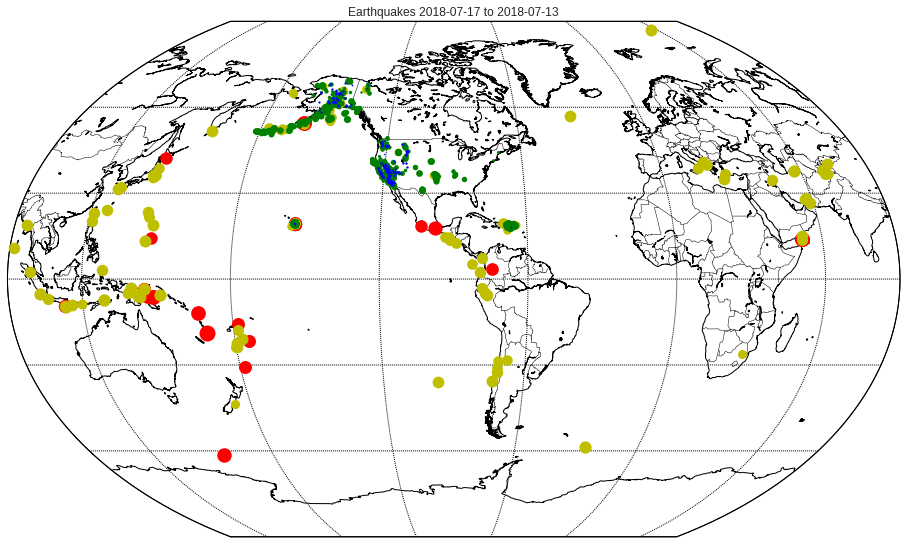

In [9]:
# Set up Basemap
mpl.rcParams['figure.figsize'] = '16, 12'
m = Basemap(projection='kav7', lon_0=-90, resolution = 'l', area_thresh = 1000.0)
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='1')
m.drawparallels(np.arange(-90.,99.,30.))
junk = m.drawmeridians(np.arange(-180.,180.,60.))

# control marker color and size based on magnitude
def get_marker(magnitude):
    markersize = magnitude * 2.5;
    if magnitude < 1.0:
        return ('bo'), markersize
    if magnitude < 3.0:
        return ('go'), markersize
    elif magnitude < 5.0:
        return ('yo'), markersize
    else:
        return ('ro'), markersize

# sort earthquakes by magnitude so that weaker earthquakes
# are plotted after (i.e. on top of) stronger ones
# the stronger quakes have bigger circles, so we'll see both
quakes.sort(key=lambda q: q.magnitude, reverse=True)

# add earthquake info to the plot
for q in quakes:
    x,y = m(q.lon, q.lat)
    mcolor, msize = get_marker(q.magnitude)
    m.plot(x, y, mcolor, markersize=msize)

# add a title
plt.title("Earthquakes {0} to {1}".format(quakes[-1].timestamp[:10],
                                          quakes[0].timestamp[:10]))